In [56]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reading the DATA SET

In [4]:
data = pd.read_csv(r'/Users/batul/Desktop/Capstone/flights.csv')
airport = pd.read_csv(r'/Users/batul/Desktop/Capstone/airports.csv')
airlines = pd.read_csv(r'/Users/batul/Desktop/Capstone/airlines.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

The Data Contains 31 columns and 1048575 Rows

In [7]:
data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [8]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [12]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE'])

In [13]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [14]:
airport.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [15]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [16]:
Data_NULL = data.isnull().sum()*100/data.shape[0]
Data_NULL

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

In [17]:
# Dropping of subset of null values
data1 = data.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [18]:
data1.shape

(5714008, 31)

In [19]:
data1.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5714008
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64

In [20]:
# Creting Dataset w.r.t different Types of Delays
data11 = data1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
data11 = data11.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [21]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063439 entries, 27 to 5819071
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   AIRLINE              1063439 non-null  object 
 1   ORIGIN_AIRPORT       1063439 non-null  object 
 2   DESTINATION_AIRPORT  1063439 non-null  object 
 3   DEPARTURE_DELAY      1063439 non-null  float64
 4   TAXI_OUT             1063439 non-null  float64
 5   ELAPSED_TIME         1063439 non-null  float64
 6   DISTANCE             1063439 non-null  int64  
 7   TAXI_IN              1063439 non-null  float64
 8   ARRIVAL_DELAY        1063439 non-null  float64
 9   AIR_SYSTEM_DELAY     1063439 non-null  float64
 10  SECURITY_DELAY       1063439 non-null  float64
 11  AIRLINE_DELAY        1063439 non-null  float64
 12  LATE_AIRCRAFT_DELAY  1063439 non-null  float64
 13  WEATHER_DELAY        1063439 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage:

In [22]:
# The other Dataset
Flight_Delays = data11

In [28]:
# Creating Dataset by removing null values by not focussing fully on different types of Delays
data2 = data1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [29]:
data2.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [30]:
data2.shape

(5714008, 25)

In [31]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [32]:
data2.DEPARTURE_TIME.isnull().sum()

0

In [33]:
data2.DEPARTURE_TIME.dtype

dtype('float64')

In [34]:
data2.DEPARTURE_TIME

0          2354.0
1             2.0
2            18.0
3            15.0
4            24.0
            ...  
5819074    2355.0
5819075    2355.0
5819076    2350.0
5819077    2353.0
5819078      14.0
Name: DEPARTURE_TIME, Length: 5714008, dtype: float64

In [35]:
# Creating a function to change the way of representation of time in the column
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [36]:
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Actual_Departure']

0          23:54:00
1          00:02:00
2          00:18:00
3          00:15:00
4          00:24:00
             ...   
5819074    23:55:00
5819075    23:55:00
5819076    23:50:00
5819077    23:53:00
5819078    00:14:00
Name: Actual_Departure, Length: 5714008, dtype: object

In [37]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure'],
      dtype='object')

In [38]:
# Creating Date in the Datetime format
data2['Date'] = pd.to_datetime(data2[['YEAR','MONTH','DAY']])
data2.Date

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
5819074   2015-12-31
5819075   2015-12-31
5819076   2015-12-31
5819077   2015-12-31
5819078   2015-12-31
Name: Date, Length: 5714008, dtype: datetime64[ns]

In [61]:
data2['Day'] = data2['Date'].dt.day_name()

In [62]:
# Applying the function to required variables in the dataset
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Scheduled_Arrival'] =data1['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)
data2['Scheduled_Departure'] =data1['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)
data2['Actual_Arrival'] =data1['ARRIVAL_TIME'].apply(Format_Hourmin)

# Merging of  3 data sets

Since there are three dataset it is required to merge all the three data set so that we can use it during the visualization in a proper way.

In [63]:
# Merging on AIRLINE and IATA_CODE
data2 = data2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [64]:
data2 = data2.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [65]:
data2 = data2.rename(columns={"AIRLINE_y":"AIRLINE"})

In [66]:
data2 = data2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
data2 = data2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [67]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'Actual_Departure', 'Date',
       'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival', 'Day',
       'AIRLINE', 'IATA_CODE_x', 'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x',
       'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [68]:
data2 = data2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)

In [69]:
data2 = data2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [70]:
data2

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,Scheduled_Departure,Actual_Arrival,Day,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,00:05:00,04:08:00,Thursday,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
1,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,00:45:00,04:55:00,Thursday,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
2,2015,1,1,4,134,N464AS,ANC,SEA,155,140.0,...,01:55:00,05:58:00,Thursday,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
3,2015,1,1,4,114,N303AS,ANC,SEA,220,209.0,...,02:20:00,06:28:00,Thursday,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
4,2015,1,1,4,730,N423AS,ANC,SEA,505,457.0,...,05:05:00,09:16:00,Thursday,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,2015,12,29,2,2734,N884AS,MEI,PIB,2046,2037.0,...,20:46:00,21:02:00,Tuesday,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
5221996,2015,12,30,3,2730,N880AS,MEI,PIB,1435,1616.0,...,14:35:00,16:39:00,Wednesday,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
5221997,2015,12,30,3,2734,N907EV,MEI,PIB,2046,2056.0,...,20:46:00,21:30:00,Wednesday,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
5221998,2015,12,31,4,2730,N907EV,MEI,PIB,1435,1421.0,...,14:35:00,14:51:00,Thursday,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel


In [71]:
# we are taking the required data into Account for visualization and the Analysis
ReqdData = pd.DataFrame(data2[['AIRLINE','Org_Airport_Name','Origin_city',
                               'Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure','Date','Day',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED',]])

In [72]:
data2.DEPARTURE_TIME.dtype

dtype('float64')

In [73]:
ReqdData = ReqdData.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [74]:
ReqdData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5219244 entries, 0 to 5221999
Data columns (total 22 columns):
 #   Column               Dtype         
---  ------               -----         
 0   AIRLINE              object        
 1   Org_Airport_Name     object        
 2   Origin_city          object        
 3   Dest_Airport_Name    object        
 4   Destination_city     object        
 5   ORIGIN_AIRPORT       object        
 6   DESTINATION_AIRPORT  object        
 7   DISTANCE             int64         
 8   Actual_Departure     object        
 9   Date                 datetime64[ns]
 10  Day                  object        
 11  Scheduled_Departure  object        
 12  DEPARTURE_DELAY      float64       
 13  Actual_Arrival       object        
 14  Scheduled_Arrival    object        
 15  ARRIVAL_DELAY        float64       
 16  SCHEDULED_TIME       float64       
 17  ELAPSED_TIME         float64       
 18  AIR_TIME             float64       
 19  TAXI_IN              

In [75]:
# Cleaned Dataset for visualization and Analysis
Flights = ReqdData
Flights

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,173.0,4.0,17.0,0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,170.0,11.0,17.0,0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,176.0,8.0,15.0,0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205.0,199.0,179.0,4.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69,20:37:00,2015-12-29,...,-9.0,21:02:00,21:20:00,-18.0,34.0,25.0,17.0,2.0,6.0,0
5221996,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69,16:16:00,2015-12-30,...,101.0,16:39:00,15:09:00,90.0,34.0,23.0,14.0,5.0,4.0,0
5221997,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69,20:56:00,2015-12-30,...,10.0,21:30:00,21:20:00,10.0,34.0,34.0,18.0,4.0,12.0,0
5221998,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69,14:21:00,2015-12-31,...,-14.0,14:51:00,15:09:00,-18.0,34.0,30.0,18.0,3.0,9.0,0


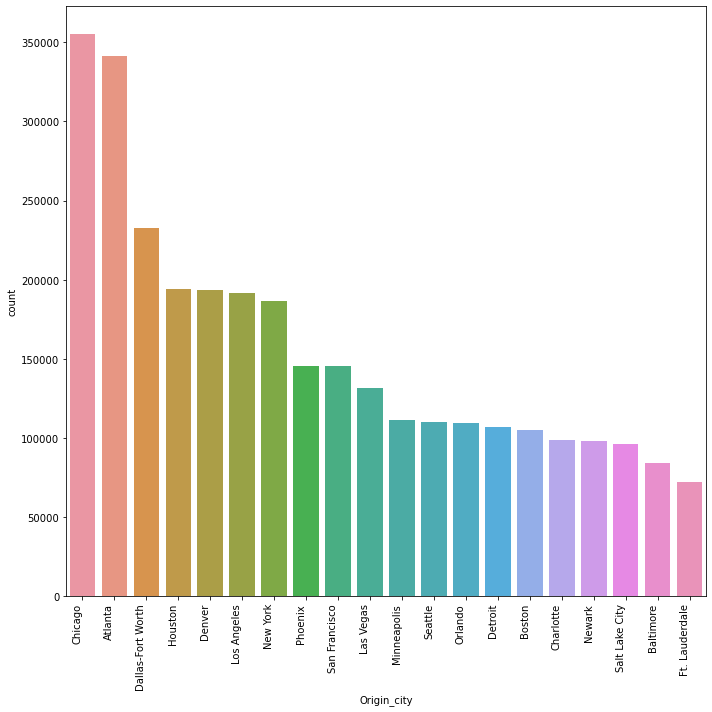

In [76]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Origin_city'], data = Flights,
              order=Flights['Origin_city'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

# The Figure shows that Chicago and Atlanta has the highest count of flight from origin city 

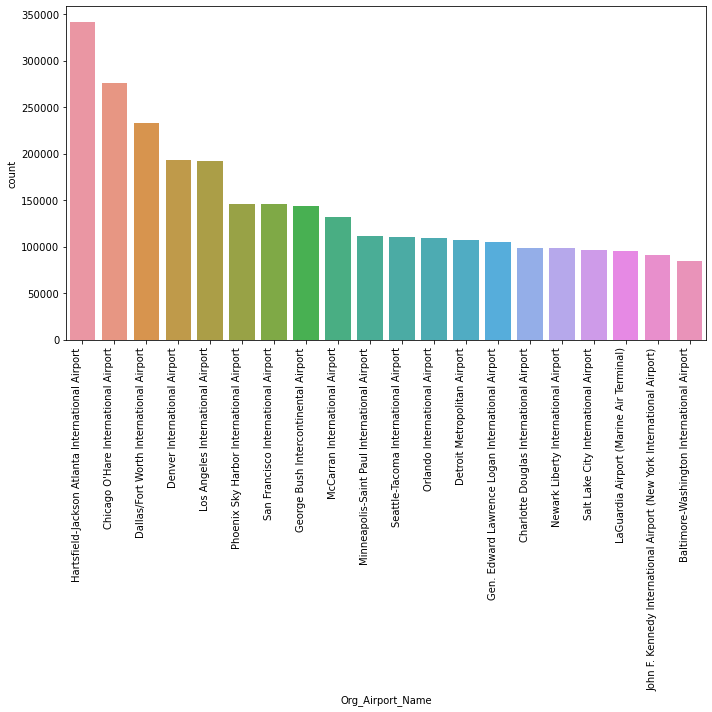

In [77]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Org_Airport_Name'], data = Flights,
              order=Flights['Org_Airport_Name'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

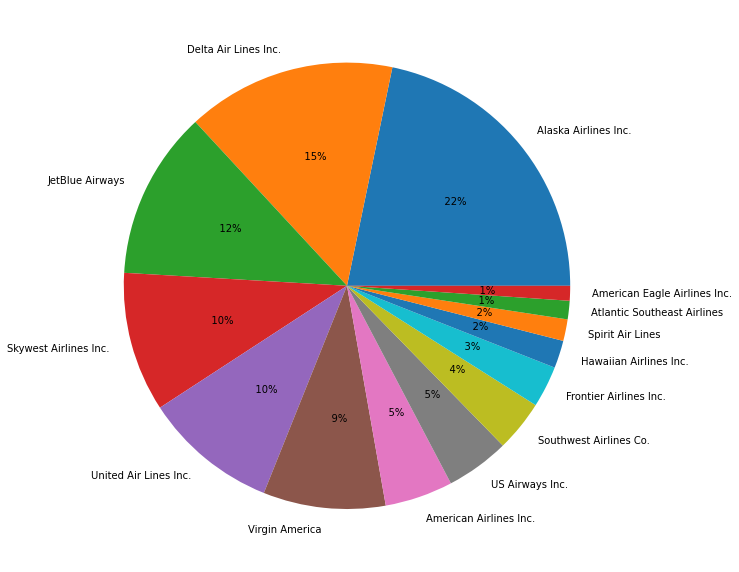

In [78]:
axis = plt.subplots(figsize=(10,14))
Name = Flights["AIRLINE"].unique()
size = Flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

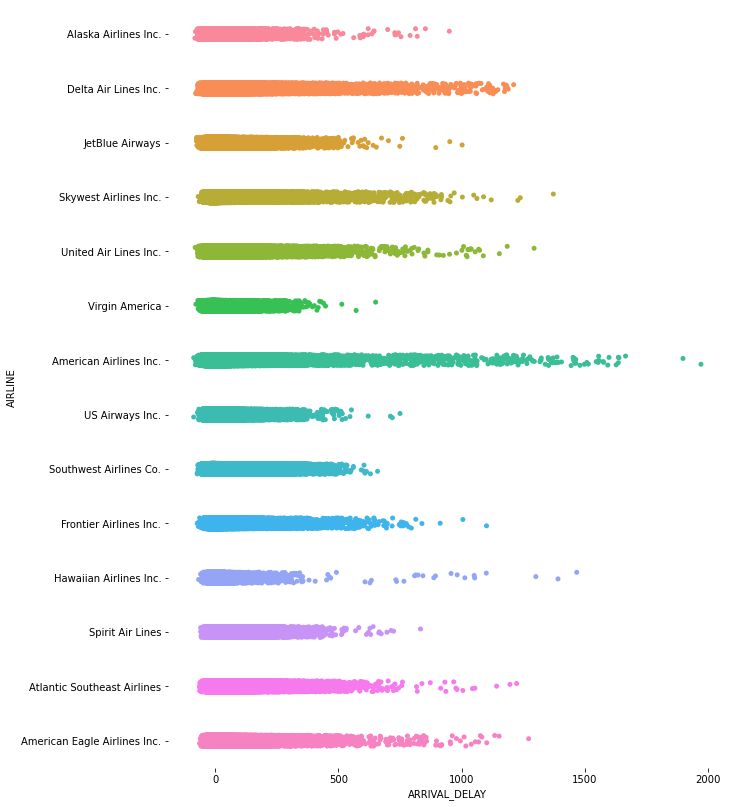

In [79]:
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data = Flights, dodge=True, jitter=True
            )
plt.show()

American Airlines Inc has the highest Arrival Delay.

# Tableau Visualization to give more clear Insight and Inferences

[Text(0.5, 0, 'TAXI_TIME (TAXI_OUT: green, TAXI_IN: red)')]

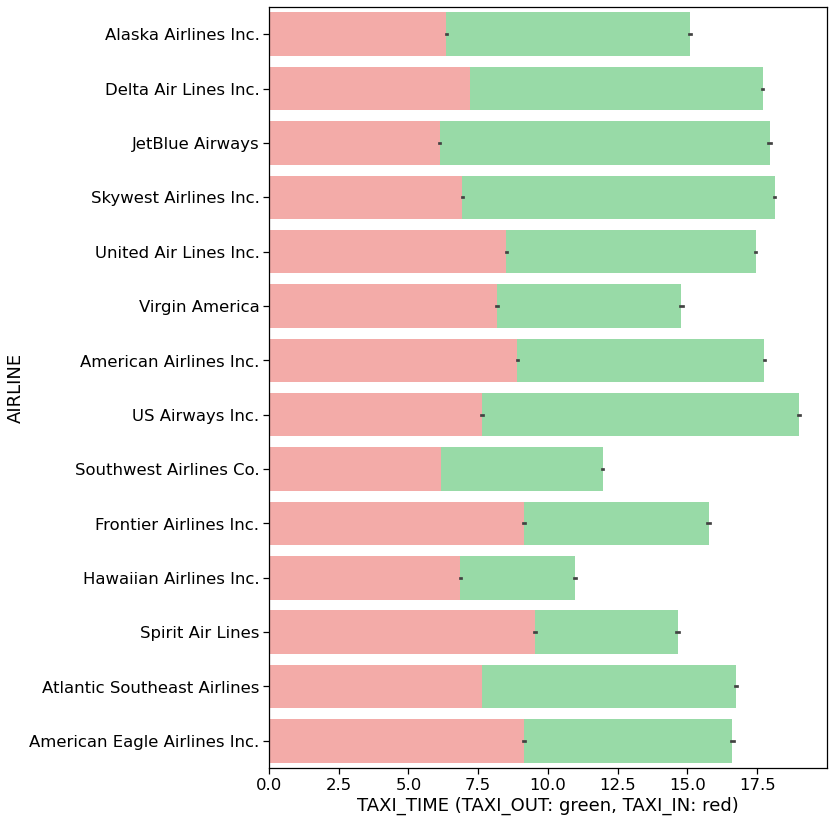

In [91]:
# Plot to show the Taxi In and Taxi Out Time
axis = plt.subplots(figsize=(10,14))
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
axis = sns.barplot(x="TAXI_OUT", y="AIRLINE", data=Flights, color="g")
axis = sns.barplot(x="TAXI_IN", y="AIRLINE", data=Flights, color="r")
axis.set(xlabel="TAXI_TIME (TAXI_OUT: green, TAXI_IN: red)")

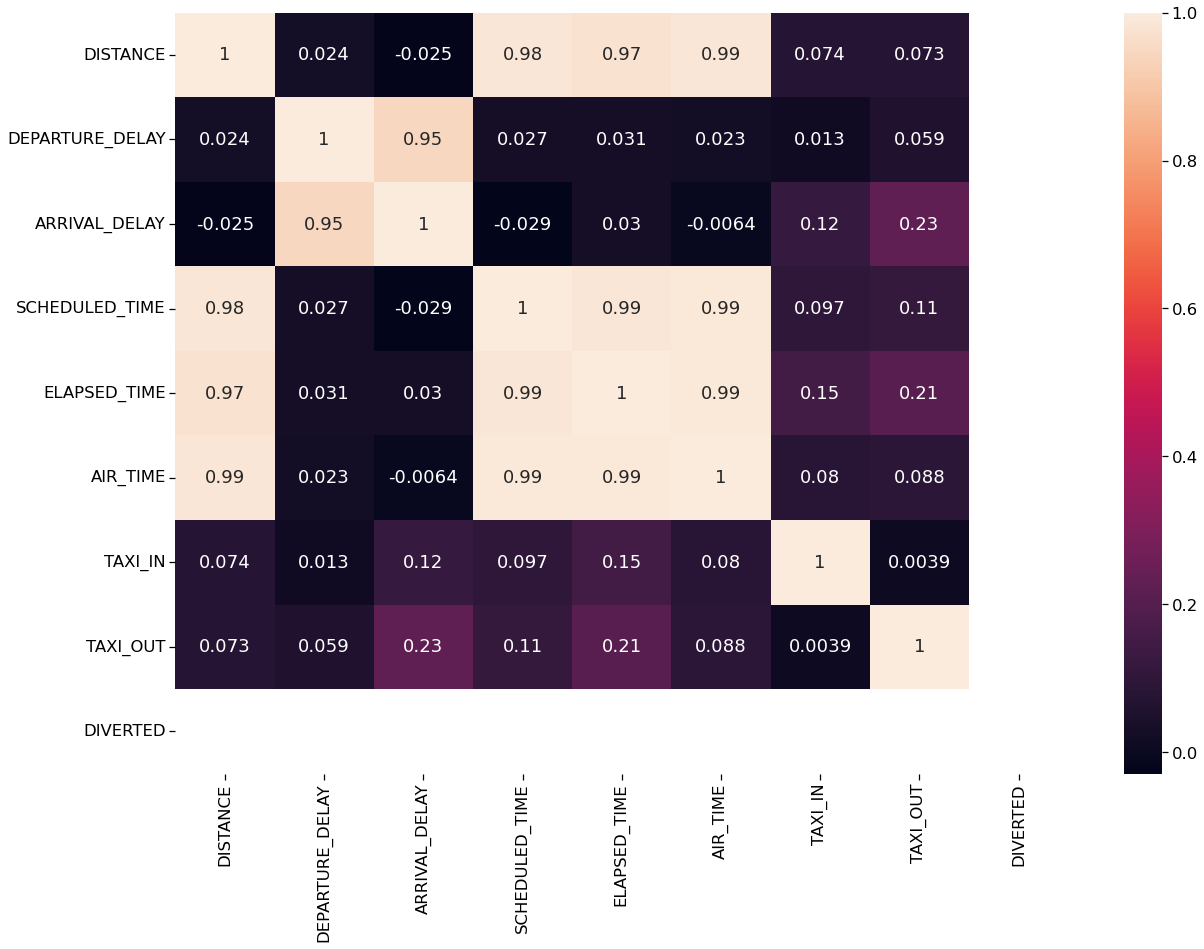

In [92]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(Flights.corr(),annot = True)
plt.show()

# Very High Correlation Between Arrival Delay and Departure Delay

# Conclusion

We can see that maximum arrival Delays are dependent on the Departure Delays of the Airport. The first part is dealt with cleaning and exploration of the data set to get more insights and the second part dealt with the sitting of the model to predict the delays. For exploratory Analysis I used visualization tools like tableau and
matplotlib. 

We can see that departure delay is the main problem which is creating Delay in the aviation industry. Departure Delays can be caused due Security Delay, Airline System Delays, Airlines Delay etc. The Delays affect the revenue of the company to a great extent so the delays has to be reduced as much as possible so as to increase the profitability in the Airline Industry. Customer Satisfaction will also be greatly enhanced if the delays can be brought down as low as possible.